# LightGBM

## Libary, Import setting

In [1]:
import lightgbm as lgb
from matplotlib import pyplot as plt
from matplotlib import rcParams
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings

rcParams['figure.figsize'] = (16,8)
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 100)
pd.set_option('display.precision', 4)
warnings.simplefilter('ignore')

In [11]:
# Load the train data

data_dir = Path(r'C:\Users\789\Desktop\github_local\Machine Learning\machine-learning-projects\data\astronomical-object')
feature_dir = Path(r'C:\Users\789\Desktop\github_local\Machine Learning\machine-learning-projects\build\feature')
sub_dir = Path(r'C:\Users\789\Desktop\github_local\Machine Learning\machine-learning-projects\build\sub')

trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
sample_file = sub_dir / 'sample_submission.csv'

target_col = 'type'
seed = 42

algo_name = 'lgb' #light GBM
feature_name = 'feature'
model_name = f'{algo_name}_{feature_name}'

feature_file = feature_dir / f'{feature_name}.csv'
sub_file = sub_dir / f'{model_name}.csv'

df = pd.read_csv(feature_file, index_col = 0)
print(df.shape)
df.head()

(210000, 21)


,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,
0,QSO,6.4003,23.1982,21.4320,21.3141,21.1766,21.1714,21.6445,21.6576,21.3877,21.5728,22.5043,21.4316,21.4783,21.1454,20.4224,22.7492,21.4655,21.3642,21.0206,21.1473
1,QSO,6.6708,21.4314,20.7081,20.6789,20.7034,20.4732,21.0298,20.9671,20.9377,21.0636,21.3607,20.7790,20.8897,20.6398,20.6467,21.4930,20.7585,20.7539,20.6934,20.5123
2,QSO,6.0591,17.8515,16.7279,16.6797,16.6946,16.6418,17.0331,16.9997,17.0960,17.0764,17.8673,16.7388,16.6889,16.7442,16.8080,17.8181,16.6974,16.6412,16.6602,16.6889
3,QSO,6.7627,20.7899,20.0404,19.9269,19.8438,19.4633,20.3172,20.2179,20.0739,19.7945,20.4339,19.9937,19.9855,19.7509,19.4551,20.7707,20.0017,19.8898,19.7581,19.5529
4,STAR_RED_DWARF,6.4184,26.4550,23.0588,21.4714,19.5050,18.3891,23.6291,21.7428,19.8617,18.8104,25.8592,22.4269,21.6736,19.6100,18.3761,24.8771,23.1480,21.4753,19.4873,18.3757


##### Train Set / Test Set(for submission) 나누기

In [12]:
y = df[target_col].values[:199991]
df.drop(target_col, axis = 1, inplace=True)
trn = df.iloc[:199991]
tst = df.iloc[199991:]
feature_name = df.columns.tolist()
print(y.shape, trn.shape, tst.shape)

(199991,) (199991, 20) (10009, 20)


Train Set에서 Train/CV셋으로 나누기

In [13]:
X_trn, X_val, y_trn, y_val = train_test_split(trn, y, test_size=.2, random_state=seed)
print(X_trn.shape, X_val.shape, y_trn.shape, y_val.shape)

(159992, 20) (39999, 20) (159992,) (39999,)


##### lightGBM training

In [14]:
clf = lgb.LGBMClassifier(objective='multiclass',
                         n_estimators=1000,
                         num_leaves=64,
                         learning_rate=0.1,
                         min_child_samples=10,
                         subsample=.5,
                         subsample_freq=1,
                         colsample_bytree=.8,
                         random_state=seed,
                         n_jobs=-1)
clf.fit(X_trn, y_trn,
        eval_set=[(X_val, y_val)],
        eval_metric='multiclass',
        callbacks=[lgb.early_stopping(stopping_rounds=10)])

p_val = clf.predict(X_val)
p_tst = clf.predict(tst)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 159992, number of used features: 20
[LightGBM] [Info] Start training from score -1.675027
[LightGBM] [Info] Start training from score -1.393521
[LightGBM] [Info] Start training from score -2.614424
[LightGBM] [Info] Start training from score -3.421478
[LightGBM] [Info] Start training from score -2.218079
[LightGBM] [Info] Start training from score -3.754435
[LightGBM] [Info] Start training from score -3.342937
[LightGBM] [Info] Start training from score -8.245209
[LightGBM] [Info] Start training from score -4.371531
[LightGBM] [Info] Start training from score -7.291531
[LightGBM] [Info] Start training from score -2.616732
[LightGBM] [Info] Start training from score -2.697338
[LightGBM] [Info] Start training from score -5.974066
[LightGB

In [15]:
print(f'{accuracy_score(y_val, p_val) * 100:.4f}%')

84.8546%


feature Importance visualization

<Axes: ylabel='feature'>

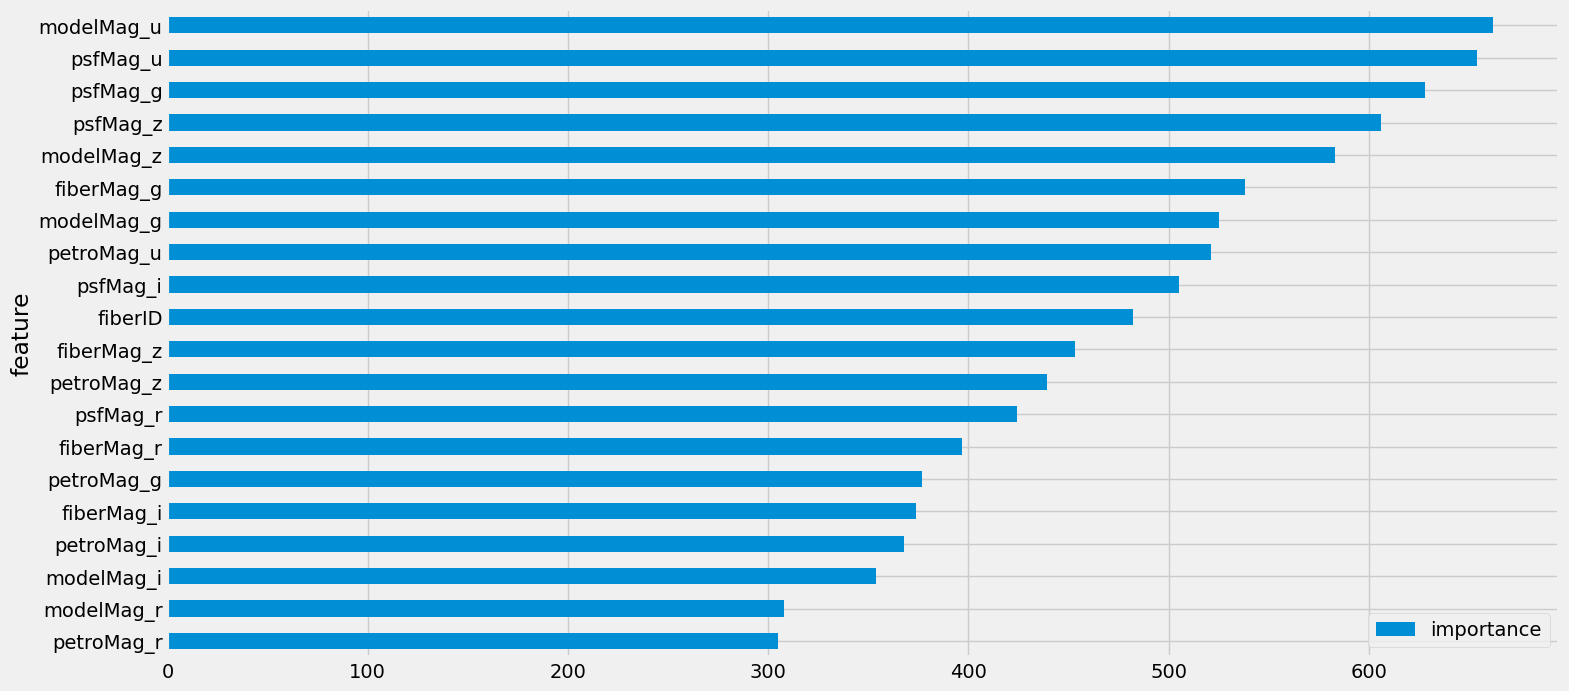

In [16]:
imp = pd.DataFrame({'feature':trn.columns,'importance':clf.feature_importances_})
imp = imp.sort_values('importance').set_index('feature')
imp.plot(kind='barh')

##### submission

In [17]:
sub = pd.read_csv(sample_file, index_col = 0)
print(sub.shape)
sub.head()

(10009, 19)


,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
id,,,,,,,,,,,,,,,,,,,
199991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
pred_prob = clf.predict_proba(tst)
sub_columns = sub.columns.to_list()
print(sub_columns)

sub[sub_columns] = pred_prob
sub.head()

['STAR_WHITE_DWARF', 'STAR_CATY_VAR', 'STAR_BROWN_DWARF', 'SERENDIPITY_RED', 'REDDEN_STD', 'STAR_BHB', 'GALAXY', 'SERENDIPITY_DISTANT', 'QSO', 'SKY', 'STAR_RED_DWARF', 'ROSAT_D', 'STAR_PN', 'SERENDIPITY_FIRST', 'STAR_CARBON', 'SPECTROPHOTO_STD', 'STAR_SUB_DWARF', 'SERENDIPITY_MANUAL', 'SERENDIPITY_BLUE']


,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
id,,,,,,,,,,,,,,,,,,,
199991,0.0318,0.0421,0.0127,0.0076,0.0191,0.0043,0.0065,4.2557e-05,0.3857,0.0001,0.0127,0.0118,0.0004,0.0030,0.0058,1.3464e-05,0.4531,0.0011,0.0021
199992,0.0920,0.2980,0.0380,0.2100,0.0567,0.0147,0.1375,8.8925e-05,0.0069,0.0004,0.0378,0.0352,0.0013,0.0089,0.0172,4.0148e-05,0.0360,0.0032,0.0062
199993,0.7609,0.0700,0.0214,0.0104,0.0320,0.0072,0.0108,5.4467e-05,0.0039,0.0002,0.0213,0.0201,0.0008,0.0054,0.0097,2.2589e-05,0.0202,0.0018,0.0038
199994,0.0591,0.1381,0.0244,0.0210,0.6200,0.0183,0.0206,9.2486e-05,0.0044,0.0002,0.0243,0.0226,0.0009,0.0057,0.0111,2.5801e-05,0.0231,0.0021,0.0040
199995,0.0498,0.0671,0.0204,0.0122,0.0302,0.0069,0.0105,6.8338e-05,0.0039,0.0002,0.0203,0.0190,0.0007,0.0048,0.0093,2.1620e-05,0.7395,0.0017,0.0034


In [20]:
sub.iloc[5:].sum(axis=1)

id
199996    1.0
199997    1.0
199998    1.0
199999    1.0
200000    1.0
         ... 
209995    1.0
209996    1.0
209997    1.0
209998    1.0
209999    1.0
Length: 10004, dtype: float64

In [21]:
sub.to_csv(sub_file)